In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import brewer2mpl
from statsmodels.stats.weightstats import *
from scipy.stats import *
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
# dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
# rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [13]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# %matplotlib inline

In [2]:
names = ['id', 'time_blue', 'time_with_math','model', 'time_red']
data = pd.read_csv('result_new_sender_0_1_matoj.csv', delimiter=',', names=names).dropna()[:100000]
print "Number of rows: %i" % data.shape[0]
print data.head()
# df = pd.DataFrame.from_dict({'delta_time': data['delta_time']})
# timeFrame = pd.Series(data['delta_time'])
# print timeFrame

Number of rows: 100000
             id     time_blue  time_with_math      model      time_red
0  21.05.2018-1  1.526901e+09    1.526901e+09   constant  1.526901e+09
1  21.05.2018-2  1.526901e+09    1.526901e+09   constant  1.526901e+09
2  21.05.2018-3  1.526901e+09    1.526901e+09   constant  1.526901e+09
3  21.05.2018-4  1.526901e+09    1.526901e+09   constant  1.526901e+09
4  21.05.2018-5  1.526901e+09    1.526901e+09   constant  1.526901e+09


In [4]:
names = ['count', 'time_one', 'time_two']
data1 = pd.read_csv('result_10s_advantage.csv', delimiter=',', names=names).dropna()
print "Number of rows: %i" % data.shape[0]
data1.head()
# df1 = pd.DataFrame.from_dict({'delta_time': data1['delta_time']})

Number of rows: 100000


,count,time_one,time_two
0,1,1.523867e+09,1.523867e+09
1,2,1.523867e+09,1.523867e+09
2,3,1.523867e+09,1.523867e+09
3,4,1.523867e+09,1.523867e+09
4,5,1.523867e+09,1.523867e+09


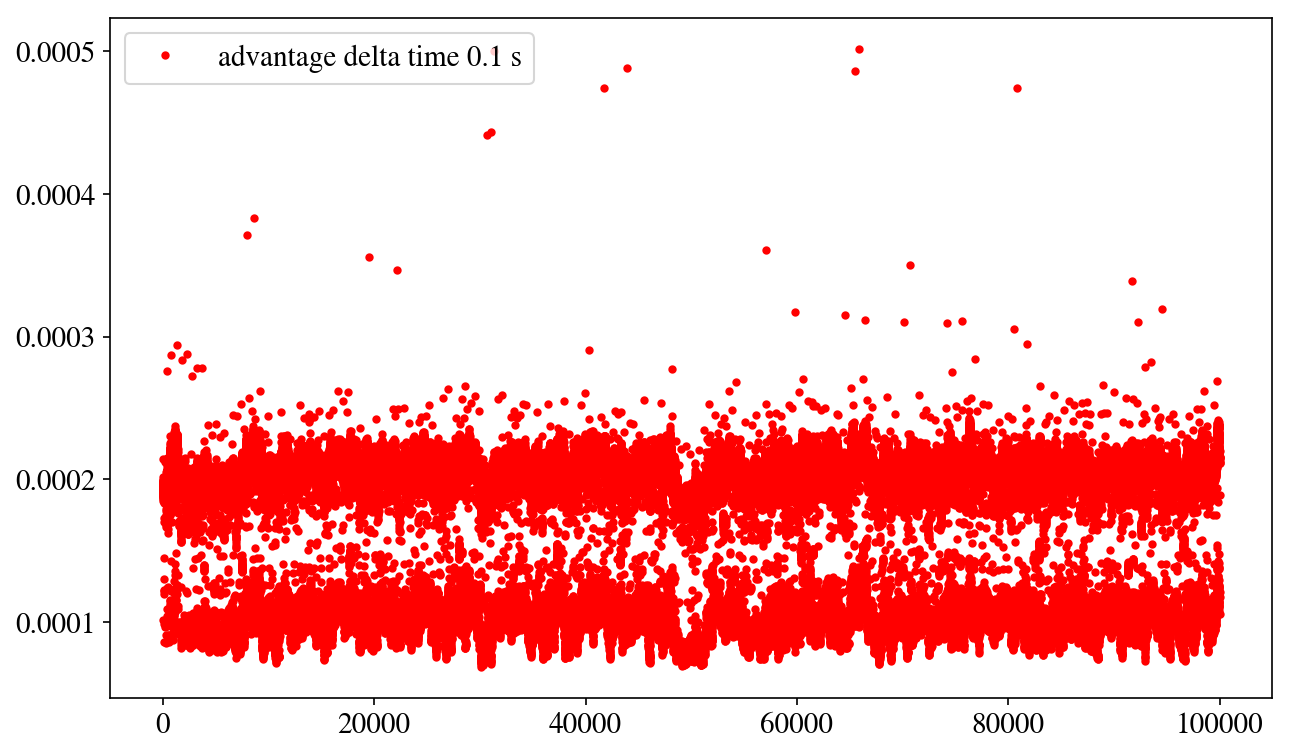

In [9]:
# df.plot(y='delta_time', style='o')
# df1.plot(y='delta_time', style='o')
x = np.array(data.index)
y = np.array(delta_time)
plt.plot(x,y,'r.', label='advantage delta time 0.1 s')
plt.legend()

In [53]:
delta_time = []
for i in xrange(len(data['time_blue'])):
    delta_time.append(data['time_red'][i] - data['time_blue'][i])
delta_time = tuple(delta_time)
# print np.array(delta_time)

In [10]:
ostatok = []
for i in xrange(len(data['time_with_math'])):
    ostatok.append(data['time_red'][i] - data['time_with_math'][i])
print np.array(ostatok)

[ 1.12056732e-05 -3.81469727e-06 -9.05990601e-06 ...  1.71661377e-05
  1.23977661e-05 -1.40666962e-05]


In [11]:
print np.mean(delta_time)
print np.std(delta_time)

0.0001817195963859558
4.457985373815303e-05


In [12]:
print np.mean(ostatok)
print np.std(ostatok)

-2.1309854984283447e-05
4.4579571831915845e-05


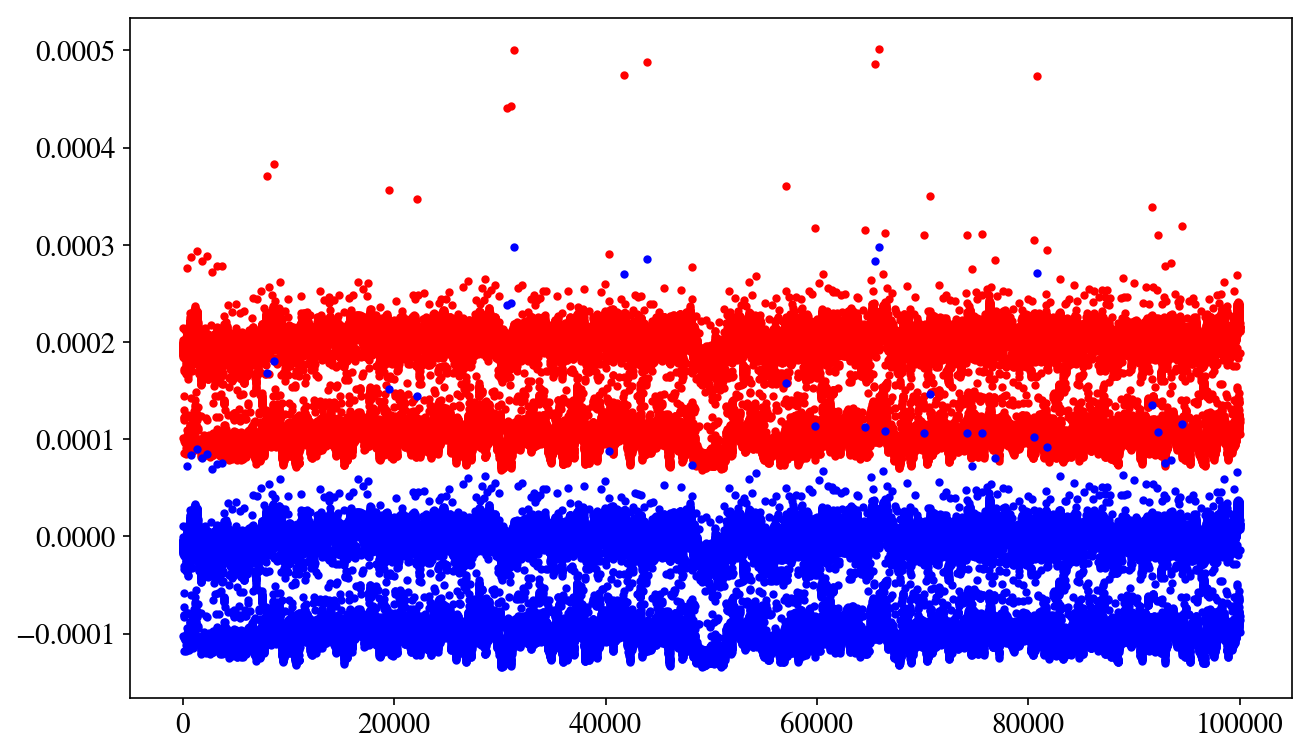

In [14]:
plt.plot(x,delta_time,'r.', label='delta')
plt.plot(x,ostatok,'b.', label='ostatok')

In [15]:
print data.describe()
# print data1.describe()

          time_blue  time_with_math      time_red
count  1.000000e+05    1.000000e+05  1.000000e+05
mean   1.526906e+09    1.526906e+09  1.526906e+09
std    2.892922e+03    2.892922e+03  2.892922e+03
min    1.526901e+09    1.526901e+09  1.526901e+09
25%    1.526903e+09    1.526903e+09  1.526903e+09
50%    1.526906e+09    1.526906e+09  1.526906e+09
75%    1.526908e+09    1.526908e+09  1.526908e+09
max    1.526911e+09    1.526911e+09  1.526911e+09


## Гистограмма выборки

(array([5.6540e+03, 1.4634e+04, 2.5330e+03, 9.8900e+02, 1.6929e+04,
        5.4361e+04, 4.7740e+03, 8.8000e+01, 1.4000e+01, 9.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 4.0000e+00]),
 array([-1.33991241e-04, -1.08564601e-04, -8.31379610e-05, -5.77113208e-05,
        -3.22846805e-05, -6.85804030e-06,  1.85685999e-05,  4.39952402e-05,
         6.94218804e-05,  9.48485206e-05,  1.20275161e-04,  1.45701801e-04,
         1.71128441e-04,  1.96555082e-04,  2.21981722e-04,  2.47408362e-04,
         2.72835002e-04,  2.98261642e-04]),
 <a list of 17 Patch objects>)

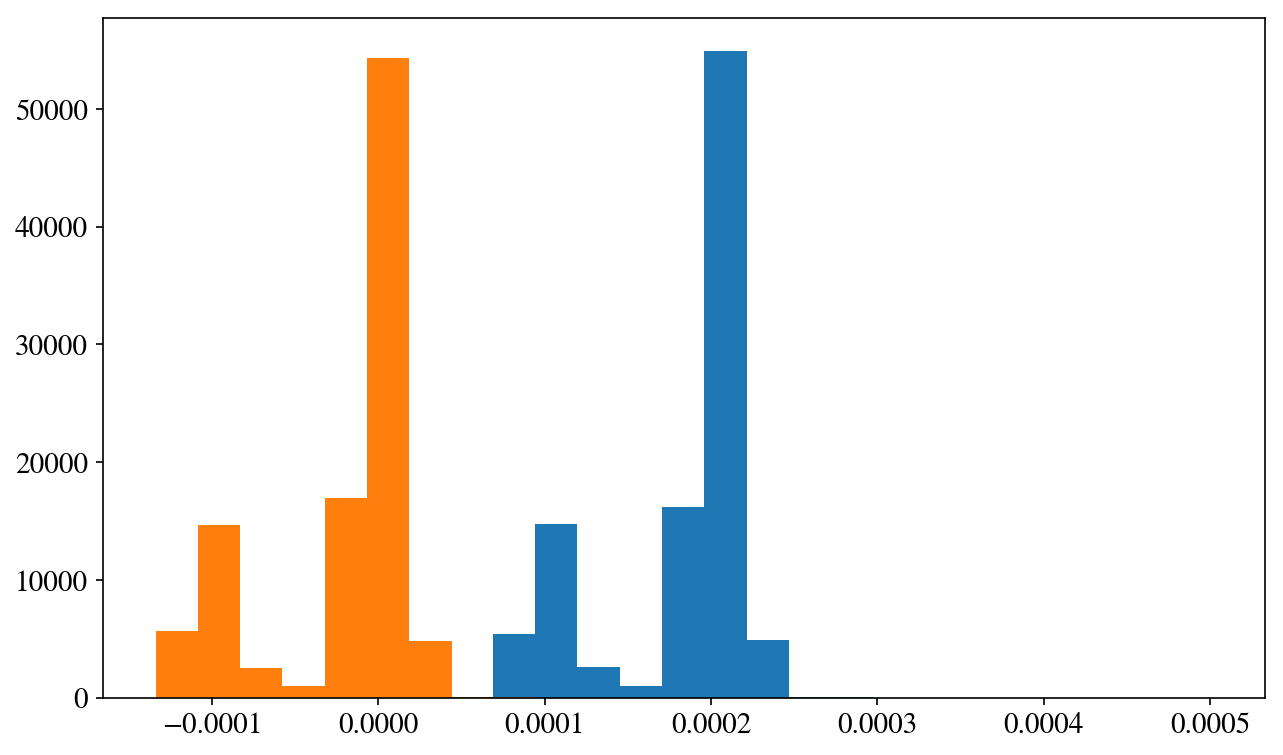

In [16]:
# timeFrame = pd.Series(data['delta_time'])
# timeFrame1 = pd.Series(data1['delta_time'])
# timeArr = sorted(np.array(data['delta_time']))
plt.hist(delta_time, bins=17)
plt.hist(ostatok, bins=17)

In [18]:
from numpy import mean, var, std
print 'mean %.6f'%mean(delta_time) # среднее значение
print 'disp %.6f'%std(delta_time) # дисперсия
print 'sko %.12f'%var(delta_time) # СКО
print 'mean ost %.6f'%mean(ostatok) # среднее значение
print 'disp ost %.6f'%std(ostatok) # дисперсия
print 'sko ost %.12f'%var(ostatok) # СКО

mean 0.000182
disp 0.000045
sko 0.000000001987
mean ost -0.000021
disp ost 0.000045
sko ost 0.000000001987


In [23]:
newY = []
mean = mean(delta_time)
for item in data['time_blue'][:25000]:
    newY.append(item + mean)
print np.array(newY)
# print np.array(data['time_red'][:50000])

[1.52690092e+09 1.52690092e+09 1.52690092e+09 ... 1.52690342e+09
 1.52690342e+09 1.52690342e+09]


In [24]:
from sklearn.metrics import mean_squared_error
np.around(mean_squared_error(np.array(data['time_red'][:25000]), newY), 120)

1.8244370494358008e-09

## Подсчет частот

In [25]:
timeFrame = pd.Series(delta_time)
prob = timeFrame.value_counts()
probList = []
for i in list(prob.values):
    j = i /100000.0
    probList.append(j)
probArr = np.array(probList)
deltaArr = np.array(prob.index)
probDf = pd.DataFrame.from_dict({'delta': prob.index, 'prob': probArr})
probDf.head()
# print probDf['prob']
# probDf.plot(x = 'delta', y= 'prob', kind= 'hist')

,delta,prob
0,0.000216,0.01488
1,0.000215,0.01323
2,0.000214,0.01223
3,0.000202,0.01191
4,0.000206,0.01190


In [28]:
import math as math
def interval(pVal, n):
    qVal = 1 - pVal
    first = pVal + 2 * math.sqrt((pVal * qVal)/n)
    second = pVal - 2 * math.sqrt((pVal * qVal)/n)
    print '%.6f < %.6f < %.6f'%(second, pVal, first)

interval(0.74, 100000)

0.737226 < 0.740000 < 0.742774


## Частоты по округлению

In [30]:
dictedNumbers = dict(timeFrame.value_counts())
keys = sorted(dictedNumbers.keys())
dictRounded = {}
rounde = np.round(keys, 6)
j = 0
while j < len(keys):
    dictRounded[rounde[j]] =  keys[j] 
    j+=1
rounded = sorted(np.round(timeFrame.value_counts().index, 7))
bools = np.isclose(rounded, np.mean(delta_time), atol=0.000050)

print 'кол-во успехов: \n', pd.Series(bools).value_counts()

кол-во успехов: 
True     415
False    405
dtype: int64


In [32]:
dictForTest = {}
for k, v in dictedNumbers.items():
    if np.isclose(k, np.mean(delta_time), atol=0.000050):
        key = np.round(k, 6)
        if key in dictForTest.keys():
            dictForTest[key] += v
        else:
            dictForTest[key] = v
print sum(dictForTest.values())
print len(dictForTest.keys())

77273
101


In [27]:
def H(G):
  dict_for_freq[G] = []
  if G+Step > Max:
    for i in data_for_rec:
      if i >= G and i < G+(Max-G):
        dict_for_freq[G].append(i)
  else:
    for i in data_for_rec:
      if i >= G and i < G+Step:
        dict_for_freq[G].append(i)
  G += Step
  if G <= Max:
    H(G)

data_for_rec = np.array(delta_time)
dict_for_freq = {}
Min = data_for_rec .min()
# Min = 0.000057
Max = data_for_rec .max()
Step = (Max - Min) / 17

H(Min)

# for k,v in sorted(dict_for_freq.items()):
#     print k, '-----', len(v)

counter = 0
for k in sorted(dict_for_freq.keys()):
  counter += 1
  if counter < 1000:
    print '%s; %.9f'%(k, len(dict_for_freq[k])/100000.)
#     print k, len(dict_for_freq[k])


6.866455078125e-05; 0.054010000
9.411924025591682e-05; 0.147880000
0.00011957392973058363; 0.026210000
0.00014502861920525045; 0.010000000
0.00017048330867991727; 0.161690000
0.00019593799815458408; 0.549610000
0.0002213926876292509; 0.049320000
0.0002468473771039177; 0.000900000
0.00027230206657858453; 0.000140000
0.00029775675605325135; 0.000090000
0.00032321144552791817; 0.000020000
0.000348666135002585; 0.000040000
0.0003741208244772518; 0.000010000
0.0003995755139519186; 0.000000000
0.00042503020342658543; 0.000020000
0.00045048489290125225; 0.000020000
0.00047593958237591907; 0.000030000
0.0005013942718505859; 0.000000000


In [60]:
Deltas = list(delta_time)
for item in Deltas:
    if (float(item) <= 0.0002213926876292509) or (float(item) > 6.866455078125e-05):
        Deltas.remove(item)
print type(Deltas)
print type(delta_time)
print len(Deltas)
print len(delta_time)

<type 'list'>
<type 'tuple'>


50000
100000


In [39]:
prob = pd.Series(Deltas).value_counts()
probList = []
for i in list(prob.values):
    j = i /50000.0
    probList.append(j)
probArr = np.array(probList)
deltaArr = np.array(prob.index)
probDf = pd.DataFrame.from_dict({'delta': prob.index, 'prob': probArr})
probDf.head()

,delta,prob
0,0.000216,0.01498
1,0.000215,0.01328
2,0.000206,0.01208
3,0.000202,0.01198
4,0.000205,0.01168


In [28]:
# import csv
# with open('clear_result.csv', 'a') as f:
#     spamwriter = csv.writer(f, delimiter=';')
#     i = 0
#     while i < len(newY):
#         forCsv = (newY[i],)
#         spamwriter.writerow(forCsv)
#         i+=1
        
import json
dictForJson= {}
with open('clear__result.json', 'a') as fp:
    dictFromPred = {}
    for i in xrange(len(newY)):
        dictFromPred[i] = newY[i]
    dictForJson['neibors'] = dictFromPred
    json.dump(dictForJson, fp)
    

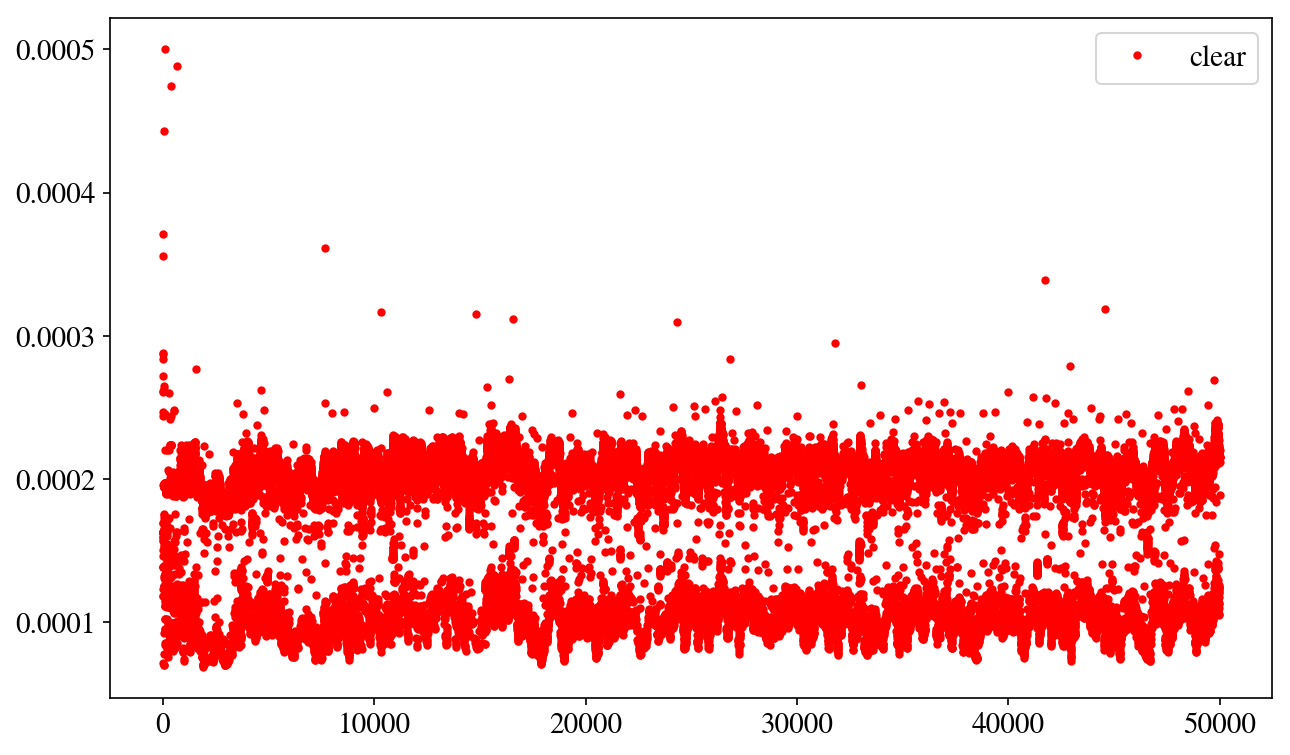

In [40]:
newX = np.arange(1, 50001)
x = np.arange(1, 50001)
plt.plot(newX,Deltas,'r.', label='clear')
# plt.plot(x,y,'b.', label='advantage delta time 0.1 s')
plt.legend()